# Análise de Modelos de Monetização em Jogos de PC e Console:

## 1. Introdução

Este projeto visa mostrar qual modelo de monetização em jogos, de Console e PC, gerou mais receita, e o impacto que esses modelos tiveram no cenário atual dos games.
Sejam esses modelos: Pay-to-Play, Free-to-Play, Assinaturas ou Híbrido.

**Modelos analisados:**
- Pay-to-Play (compra única)
- Free-to-Play (com microtransações)
- Subscription (serviços de assinatura)
- Híbrido (compra + microtransações)

Fontes de dados retiradas do Kaggle.



### Carregando Bibliotecas

In [ ]:
# carregando blibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando Dataset

In [ ]:
# carregando dataset
df = pd.read_csv('/content/vgsales.csv')

# exibir primeiras linhas
df.head()

### Limpando os Dados e preparando os Dados

In [23]:
# limpeza de dados

df = df.dropna(subset=['Year', 'Global_Sales'])

df['Year'] = df['Year'].astype(int)

plataformas_pc_console = ['PS4', 'PS3', 'PS2', 'PS', 'X360', 'XB', 'XOne', 'PC', 'Wii', 'Switch']
df = df[df['Platform'].isin(plataformas_pc_console)]

def inferir_modelo(row):
    publisher = str(row['Publisher']).lower()
    name = str(row['Name']).lower()

    if 'nintendo' in publisher or 'sony' in publisher or 'microsoft' in publisher:
        return 'Pay-to-Play'
    elif 'valve' in publisher or 'epic' in publisher or 'ea' in publisher:
        return 'Free-to-Play'
    elif 'pass' in name or 'subscription' in name:
        return 'Subscription'
    else:
        return 'Híbrido'

df['Modelo_Monetizacao'] = df.apply(inferir_modelo, axis=1)

df.head()

df.to_csv('vgsales_tratado.csv', index=False)


## 2. Análise Exploratória e Vizualização dos Dados

### 2.1 Visualização da Distribuição dos Modelos de Monetização

<ipython-input-18-2617b46ef627>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Modelo_Monetizacao', palette='Set2')


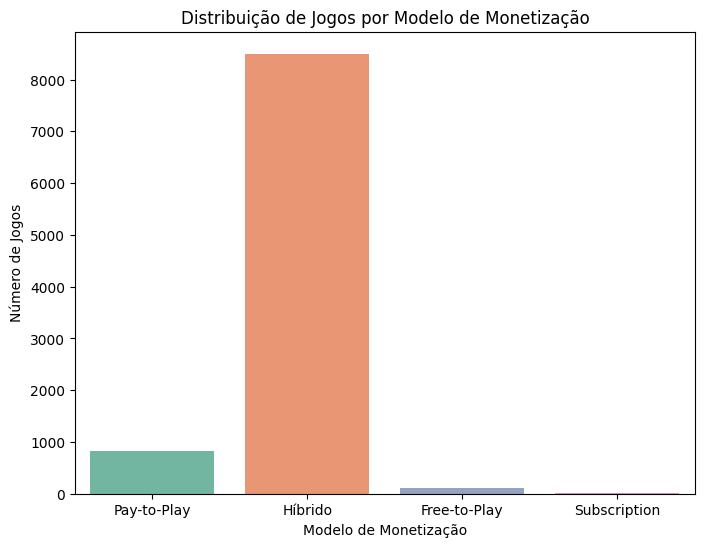

In [18]:
# visualizar distribuição dos modelos de monetização

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Modelo_Monetizacao', palette='Set2')
plt.title('Distribuição de Jogos por Modelo de Monetização')
plt.xlabel('Modelo de Monetização')
plt.ylabel('Número de Jogos')
plt.show()


### 2.2 Receita Média por Modelo de Monetização

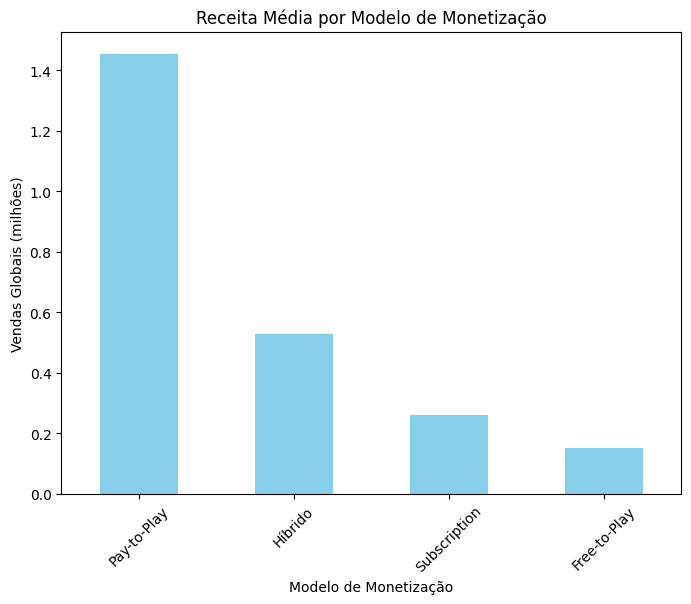

In [19]:
# receita média por modelo de monetização
receita_media = df.groupby('Modelo_Monetizacao')['Global_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
receita_media.plot(kind='bar', color='skyblue')
plt.title('Receita Média por Modelo de Monetização')
plt.xlabel('Modelo de Monetização')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.show()


### 2.3 Receita Total por Modelo de Monetização ao longo dos anos

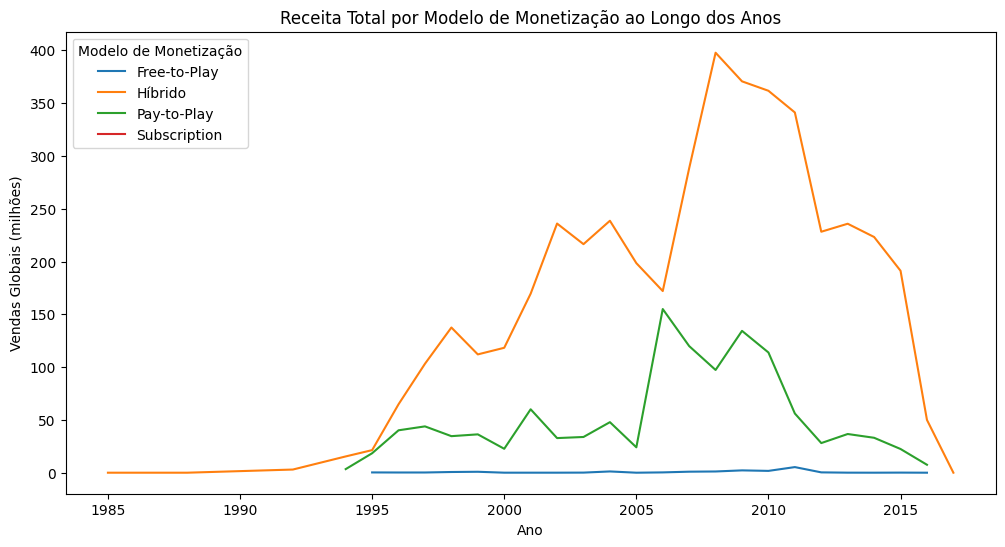

In [20]:
# receita total por modelo de monetização ao longo dos anos
df.groupby(['Year', 'Modelo_Monetizacao'])['Global_Sales'].sum().unstack().plot(kind='line', figsize=(12,6))
plt.title('Receita Total por Modelo de Monetização ao Longo dos Anos')
plt.ylabel('Vendas Globais (milhões)')
plt.xlabel('Ano')
plt.legend(title='Modelo de Monetização', loc='upper left')
plt.show()


### 2.4 Comparação entre Plataformas e Modelos de Monetização

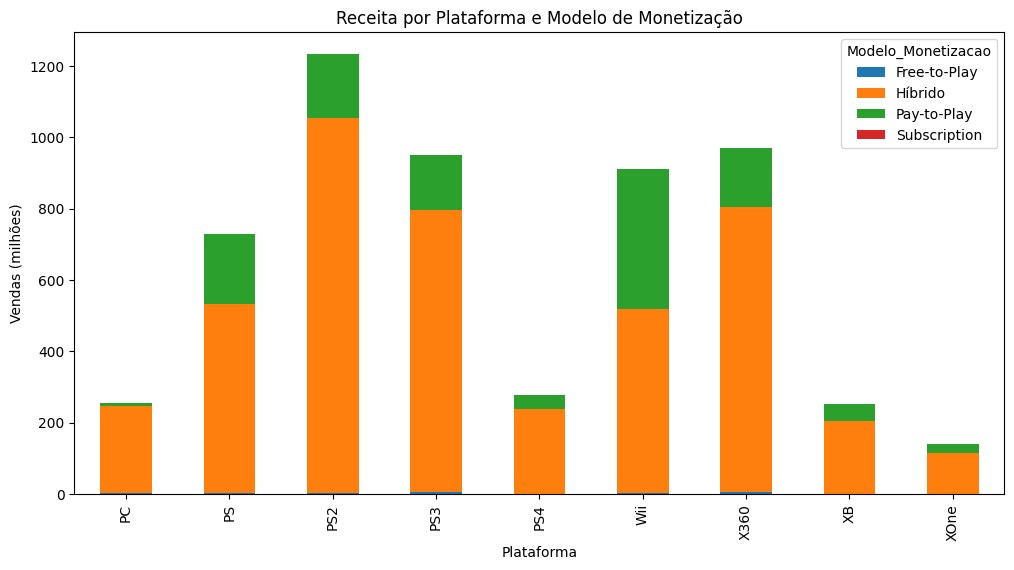

In [21]:
# comparação entre plataformas e modelos de monetização
platform_modelo = df.groupby(['Platform', 'Modelo_Monetizacao'])['Global_Sales'].sum().unstack().fillna(0)
platform_modelo.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Receita por Plataforma e Modelo de Monetização')
plt.ylabel('Vendas (milhões)')
plt.xlabel('Plataforma')
plt.show()


### 2.5 Distribuição de Gêneros por Modelo de Monetização

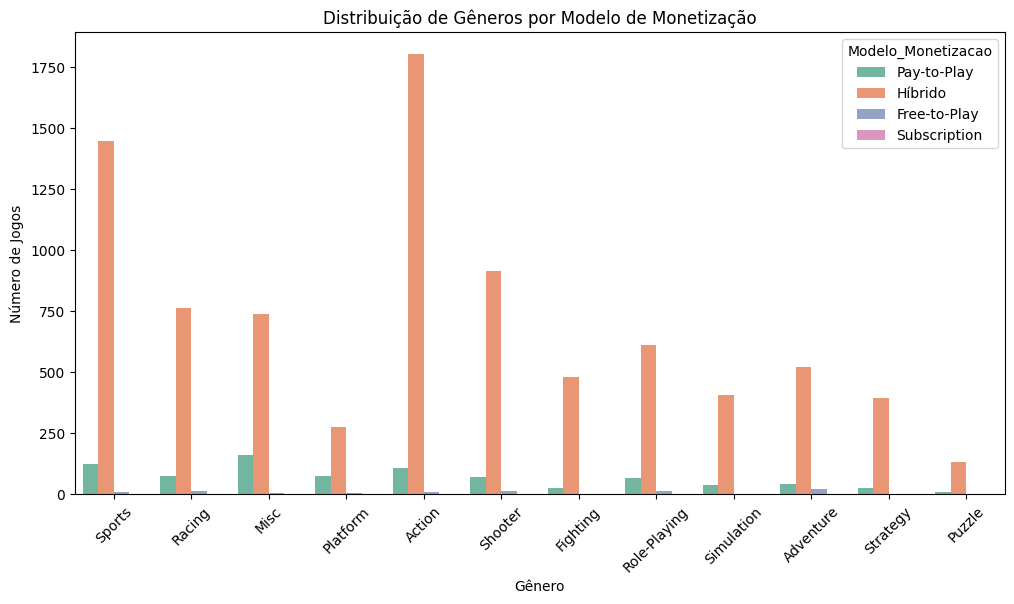

In [22]:
# distribuição de gêneros por modelo de monetização
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', hue='Modelo_Monetizacao', palette='Set2')
plt.title('Distribuição de Gêneros por Modelo de Monetização')
plt.xlabel('Gênero')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()


## 3. Insights

- **Modelo de monetização mais lucrativo:** O modelo híbrido, é o que mais gerou lucro no passado. Jogos que ofereciam microtransações, dentro de um jogo Pay-To-Play, acabava sendo mais lucrativo.
- **Crescimento por ano:** Os modelos Híbrido e Pay-To-Play, tiveram um bom crescimento em 2005, mas foi decaindo com o decorrer.
- **Plataformas dominantes:** Em gerações mais recentes dos consoles, como PS4 e XBOX ONE o modelo híbrido apresentou mais lucratividade. E ainda assim essa premissa de mercado está presente em gerações atuais, apesar de menos.
- **Gêneros populares:** A análise revela que gêneros como "ação" e "esportes" apresentam a dominância do modelo Híbrido, por conta das microtransações presentes nestes jogos, que, inclusive encontra-se em jogos atuais do mesmo gênero.



## 4. Conclusão:
Desde 2005, jogos no modelo híbrido, apresentaram um crescimento significativo, o que impactou as vendas em milhões. Mas por descontentamento do público e preços abusivos da compra + microtransações, essa prática foi decaindo drasticamente em meados de 2013. No cenário atual, ainda temos este modelo híbrido, pois gera certo lucro, mas deve haver o balanço entre o contentamento do público/jogador, e o lucro do game.